In [1]:
import IPython.display
from ppget.source import DataSource

A_DAY = 60 * 24
DAYS_OF_DATA = 730
source = DataSource("./data/household_power_consumption.txt", size=DAYS_OF_DATA * A_DAY)
source.__next__()
source.frame.head()

2006-12-16 17:20:00 -> 2008-12-15 17:20:00


,Global_active_power
timestamp,
2006-12-16 17:20:00,4.2160
2006-12-16 17:25:00,4.6616
2006-12-16 17:30:00,3.8360
2006-12-16 17:35:00,4.6684
2006-12-16 17:40:00,3.9176


In [2]:
series = source.frame
series.head()

,Global_active_power
timestamp,
2006-12-16 17:20:00,4.2160
2006-12-16 17:25:00,4.6616
2006-12-16 17:30:00,3.8360
2006-12-16 17:35:00,4.6684
2006-12-16 17:40:00,3.9176


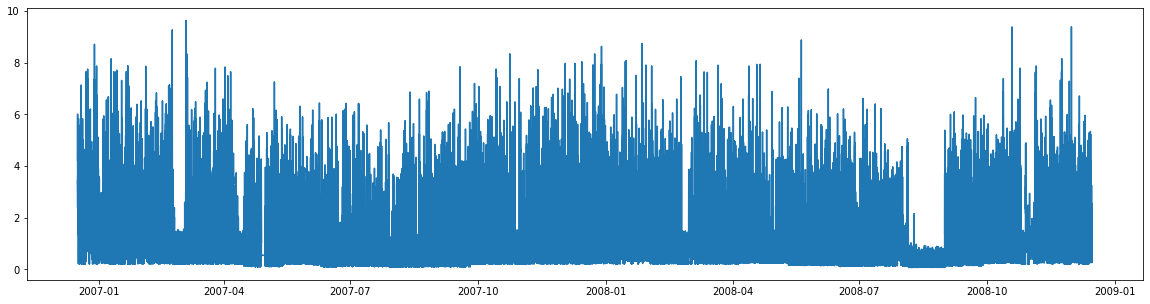

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(series, label="Ground Truth")

plt.show()

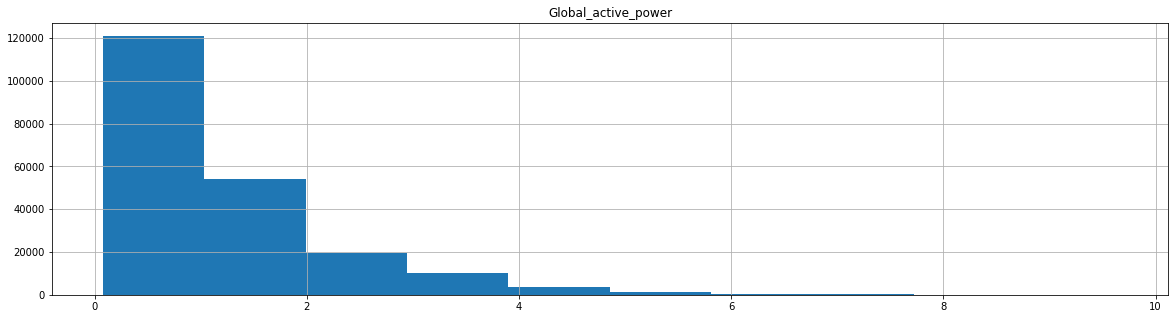

In [4]:
fig, ax = plt.subplots(figsize=(20,5))
series.hist(ax=ax)
plt.show()

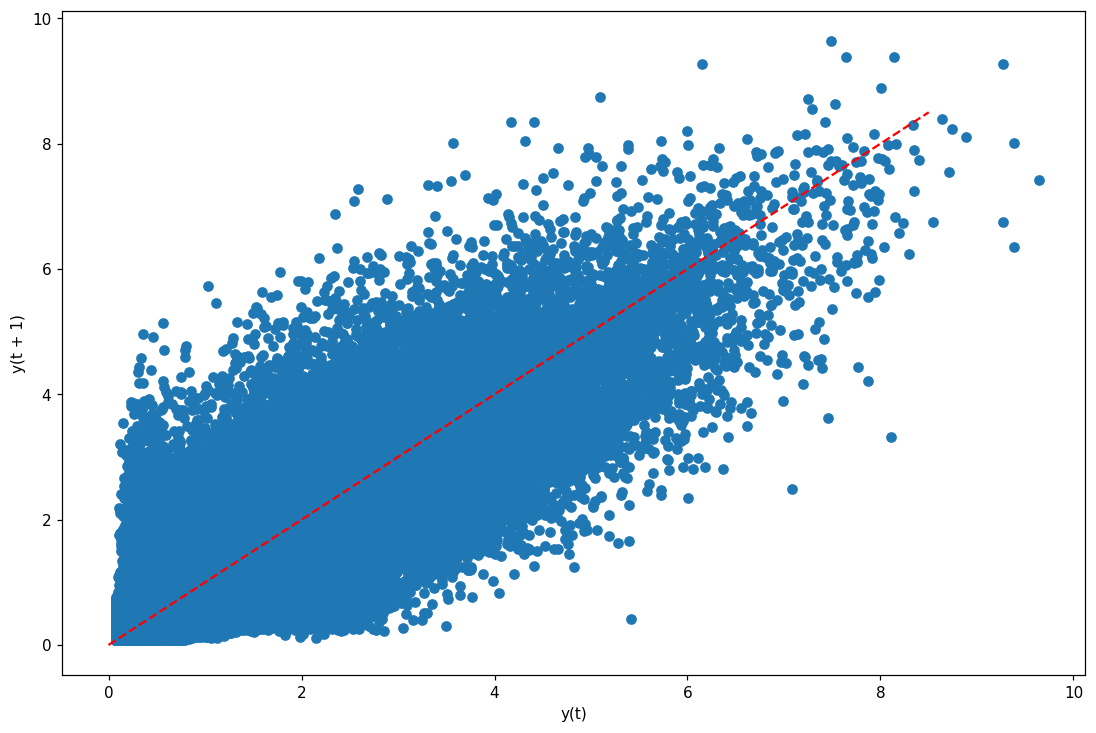

In [5]:
import pandas as pd
fig, ax = plt.subplots(figsize=(12,8), dpi=110)
pd.plotting.lag_plot(series, ax=ax)
ident = [0.0, 8.5]
ax.plot(ident,ident, color="red", linestyle="--", label="Identity")
plt.savefig(f"img/auto_correlation.png")
plt.show()

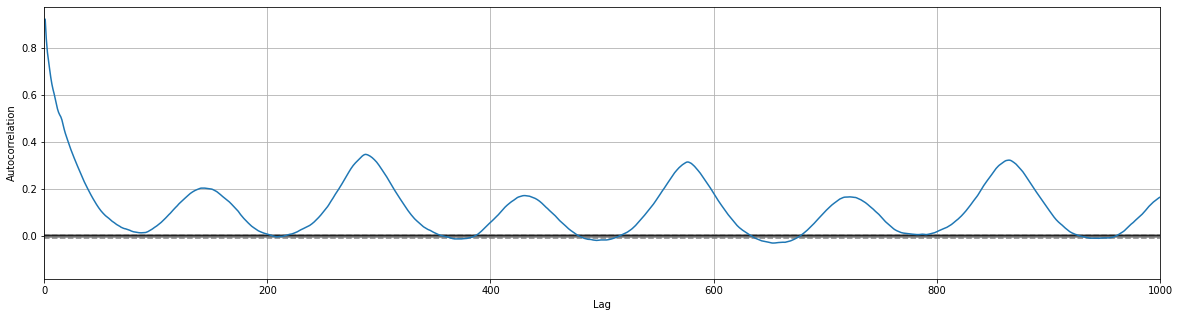

In [6]:
fig, ax = plt.subplots(figsize=(20,5))

pd.plotting.autocorrelation_plot(series, ax=ax)
plt.xlim([0, 1000])
plt.show()